## Using Incline

We showcase how to use **incline** using data from the stock market.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

### Load Google Daily Stock Price Data

Convert the date column to date, sort by date, and index the dataframe by date.

In [2]:
df = pd.read_csv('incline/data/GOOG.csv')
df.Date = pd.to_datetime(df.Date)
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


### Using incline

We start by importing the functions and then fit spline_trend and sgolay_trend to the Closing value of the stock 

In [3]:
from incline import naive_trend, spline_trend, sgolay_trend, trending

In [4]:
df1 = spline_trend(df, column_value='Close',  function_order=3, derivative_order=1, s=50000)
df1['id'] = 'GOOG-Close-spline'
df1.head()

,Open,High,Low,Close,Adj Close,Volume,smoothed_value,derivative_value,function_order,derivative_method,derivative_order,id
Date,,,,,,,,,,,,
2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500,53.577715,-0.717595,3,spline,1,GOOG-Close-spline
2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800,52.912576,-0.613191,3,spline,1,GOOG-Close-spline
2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200,52.350316,-0.511836,3,spline,1,GOOG-Close-spline
2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800,51.887887,-0.413530,3,spline,1,GOOG-Close-spline
2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400,51.522239,-0.318274,3,spline,1,GOOG-Close-spline


In [5]:
df2 = sgolay_trend(df, column_value='Close',  function_order=3, derivative_order=1)
df2['id'] = 'GOOG-Close-sgolay'
df2.head()

,Open,High,Low,Close,Adj Close,Volume,smoothed_value,derivative_value,function_order,derivative_method,derivative_order,id
Date,,,,,,,,,,,,
2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500,51.099678,1.563686,3,sgolay,1,GOOG-Close-sgolay
2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800,52.363147,0.977906,3,sgolay,1,GOOG-Close-sgolay
2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200,53.084794,0.480041,3,sgolay,1,GOOG-Close-sgolay
2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800,53.352533,0.070091,3,sgolay,1,GOOG-Close-sgolay
2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400,53.254281,-0.251943,3,sgolay,1,GOOG-Close-sgolay


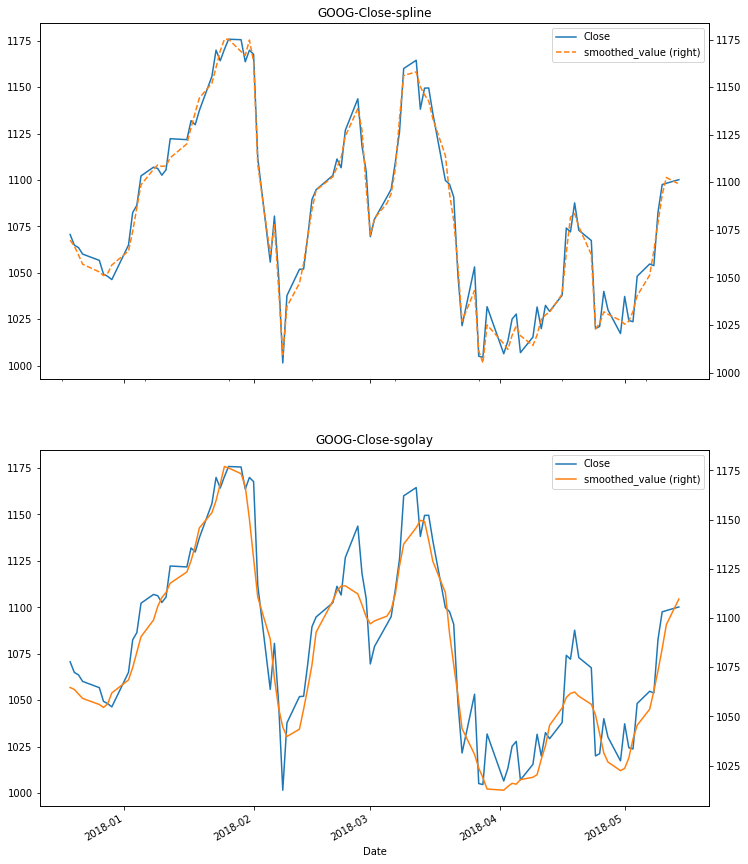

In [6]:
fig, axes = plt.subplots(2, 1)
axes[0].set_title('GOOG-Close-spline');
axes[1].set_title('GOOG-Close-sgolay');
df1[['Close', 'smoothed_value']][-100:].plot(figsize=(12, 16), secondary_y='smoothed_value', ax=axes[0], style=['-', '--']);
df2[['Close', 'smoothed_value']][-100:].plot(figsize=(12, 16), secondary_y='smoothed_value', ax=axes[1]);

In [7]:
tdf = trending([df1, df2], derivative_order=1, max_or_avg='max')
tdf

,id,max_or_avg
0,GOOG-Close-sgolay,13.407763
1,GOOG-Close-spline,15.277732


In [8]:
df3 = naive_trend(df, column_value='Close')
df3.head()

,Open,High,Low,Close,Adj Close,Volume,derivative_value,derivative_method,function_order,derivative_order
Date,,,,,,,,,,
2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500,-2.000000,naive,None,1
2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800,-2.979624,naive,None,1
2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200,-1.270739,naive,None,1
2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800,0.125181,naive,None,1
2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400,-1.280674,naive,None,1


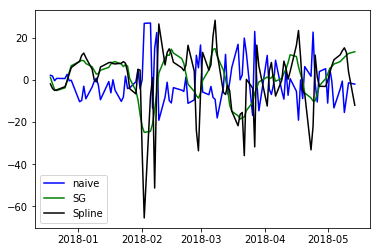

In [9]:
fig = plt.figure()
ax = plt.axes()
plt.plot(df3[['derivative_value']][-100:], color = "blue", label = "naive")
plt.plot(df2[['derivative_value']][-100:], color = "green", label = "SG")
plt.plot(df1[['derivative_value']][-100:], color = "black", label = "Spline")
plt.legend()

## Correlations Between Naive, Spline, and Savitzky-Golay Derivative Est.

In [10]:
df1[['derivative_value']].corrwith(df2[['derivative_value']], axis = 0)

derivative_value    0.699171
dtype: float64

In [11]:
df2[['derivative_value']].corrwith(df3[['derivative_value']], axis = 0)

derivative_value   -0.474181
dtype: float64